### Problem Statement :-

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.


#### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import pickle
%matplotlib inline

#### Loading dataset

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
data = pd.DataFrame(boston.data)

In [5]:
data.columns = boston.feature_names

### Describes the dataset columns:-

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000s

#### Adding target values into the dataframe

In [6]:
data['MEDV'] = boston.target

#### To display the top 5 rows

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### To display the Last 5 rows

In [8]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


#### Understanding Data

In [9]:
data.shape

(506, 14)

There are 506 rows and 14 columns.

In [10]:
# Checking the data type
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


There are no missing values in this dataset.

### Dropping the duplicate rows if any

In [12]:
# Rows containing duplicate data
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows : ", duplicate_rows_df.shape)

number of duplicate rows :  (0, 14)


There are no Duplicate rows values in this dataset.

## Statistical Analysis

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


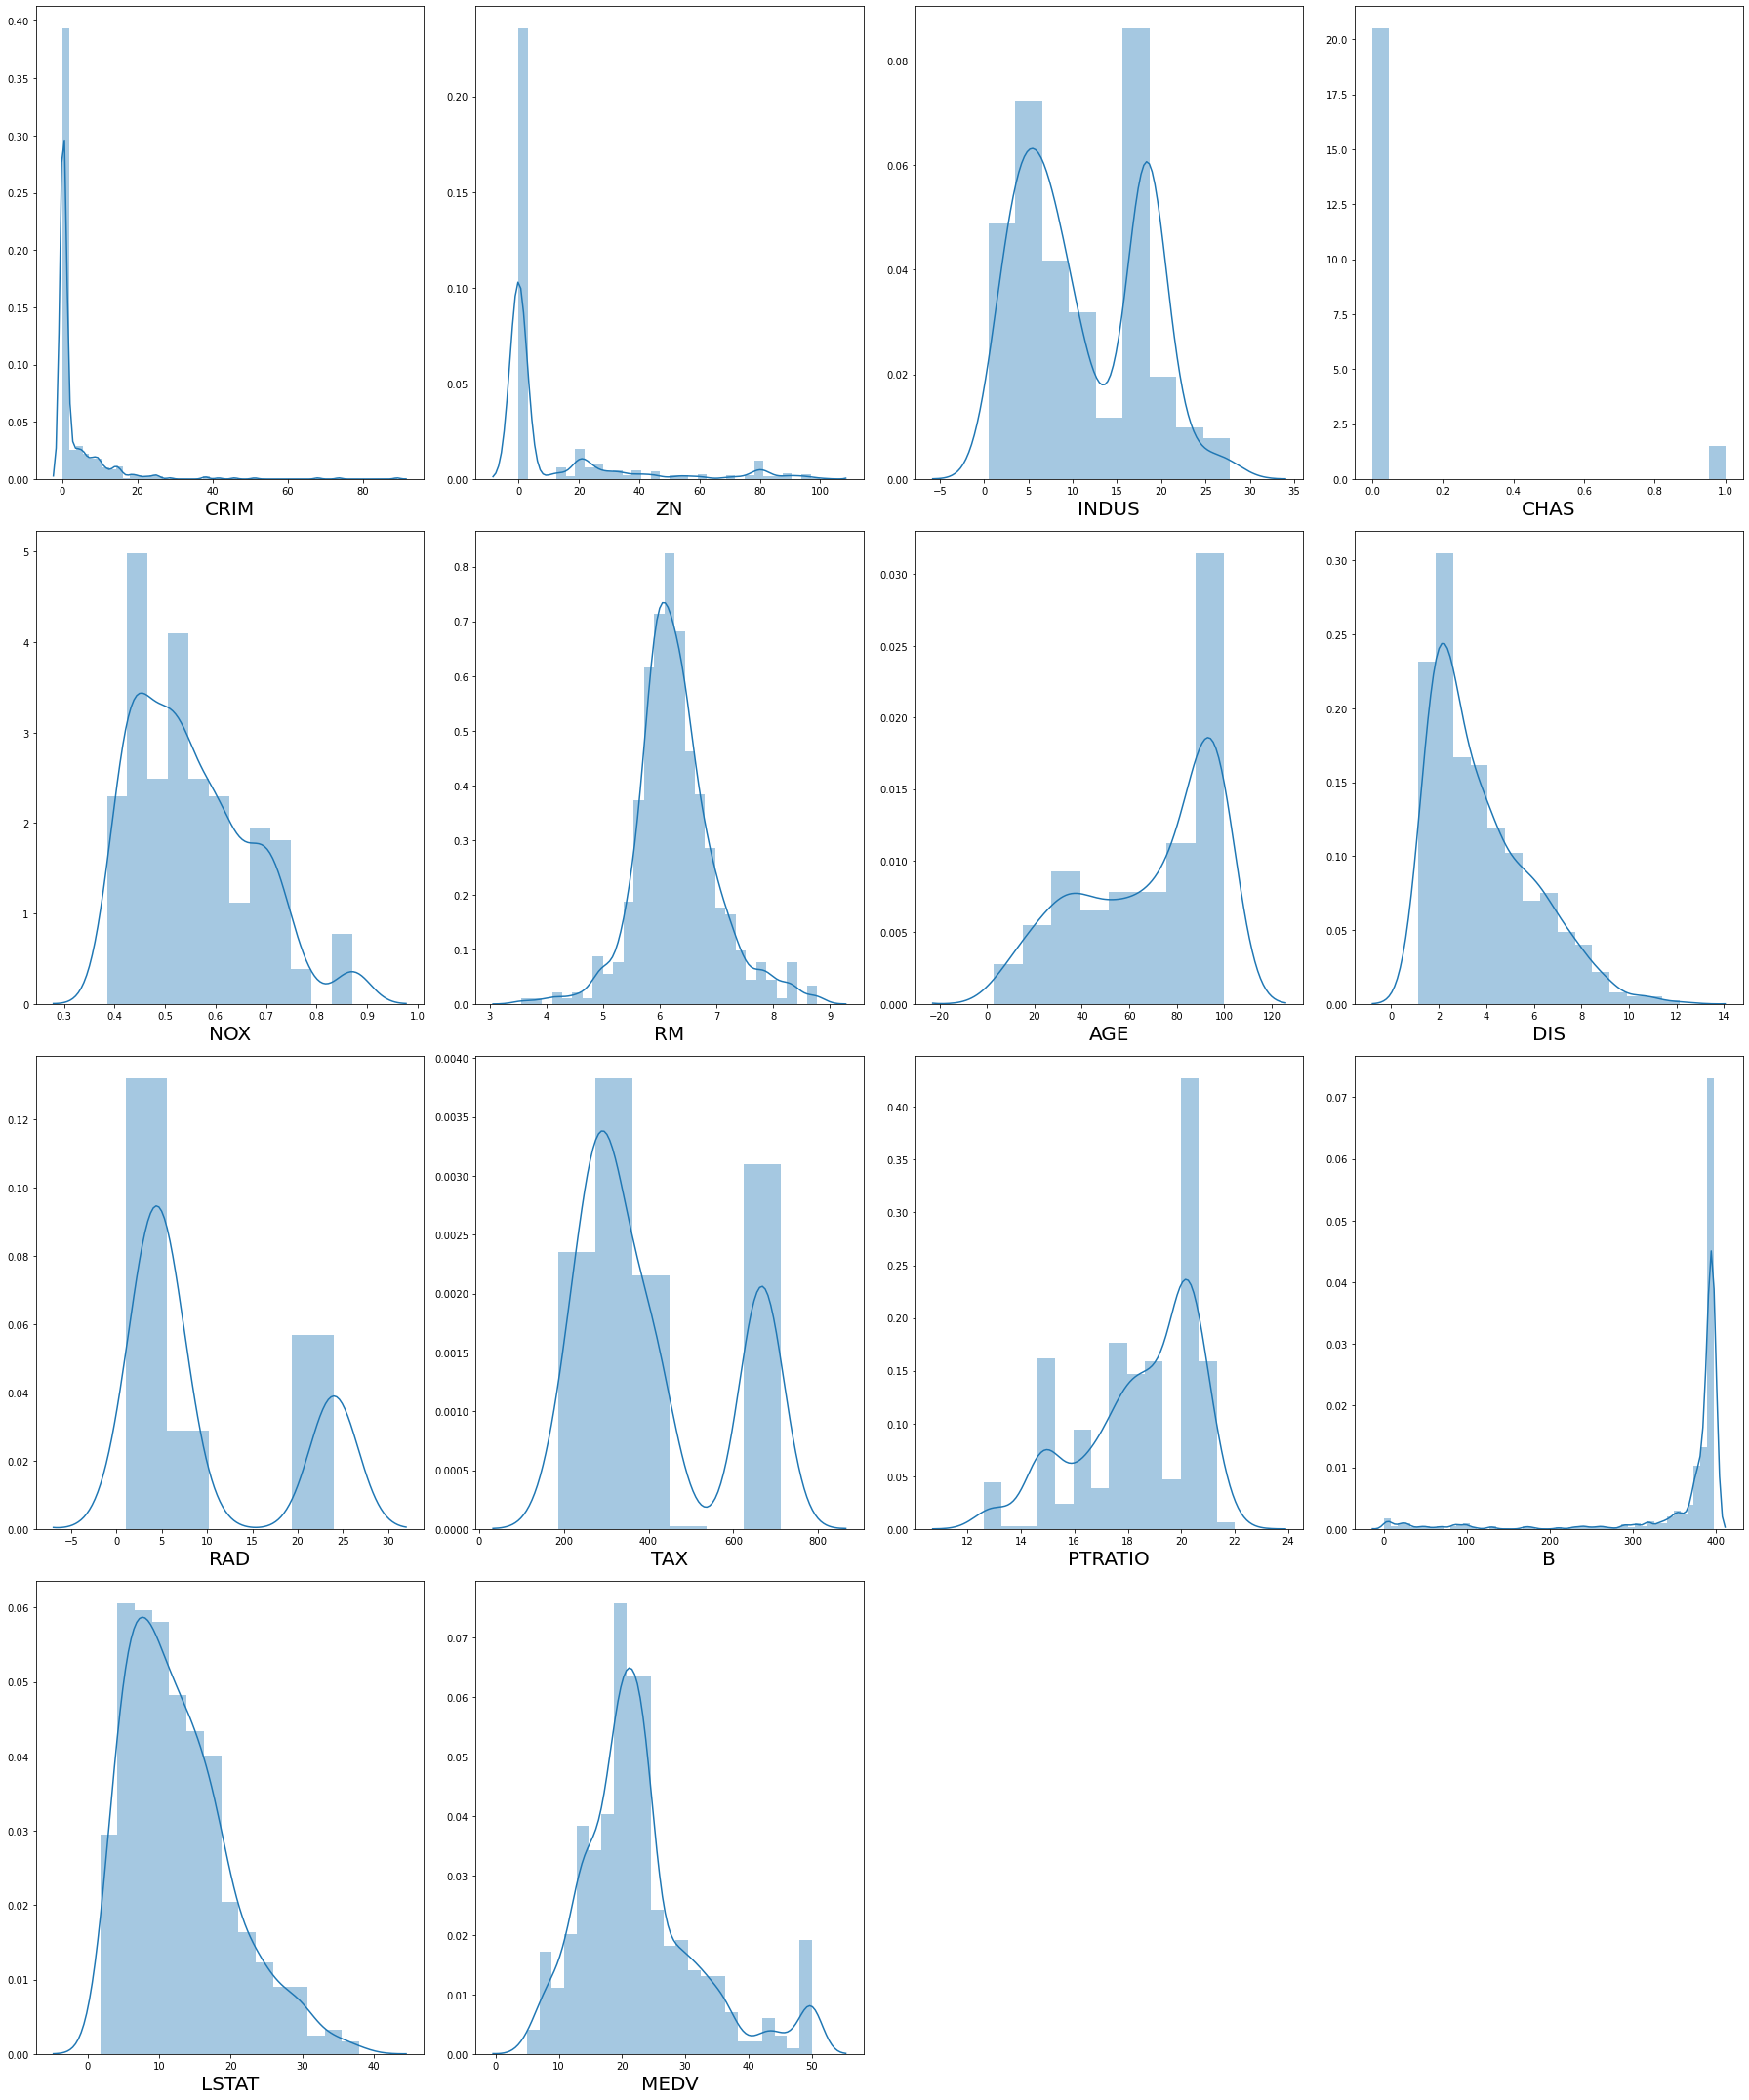

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observation :-

1) "MEDV" , "RM" are distributed normally with few outliers.

2) "LSTAT" , "PTRATIO" ,"DIS" ,"AGE" ,"NOX" ,"INDUS" are skewed distributed .


Observe relationship between target variable and other features.

In [15]:
x = data[boston.feature_names]
y = data["MEDV"]

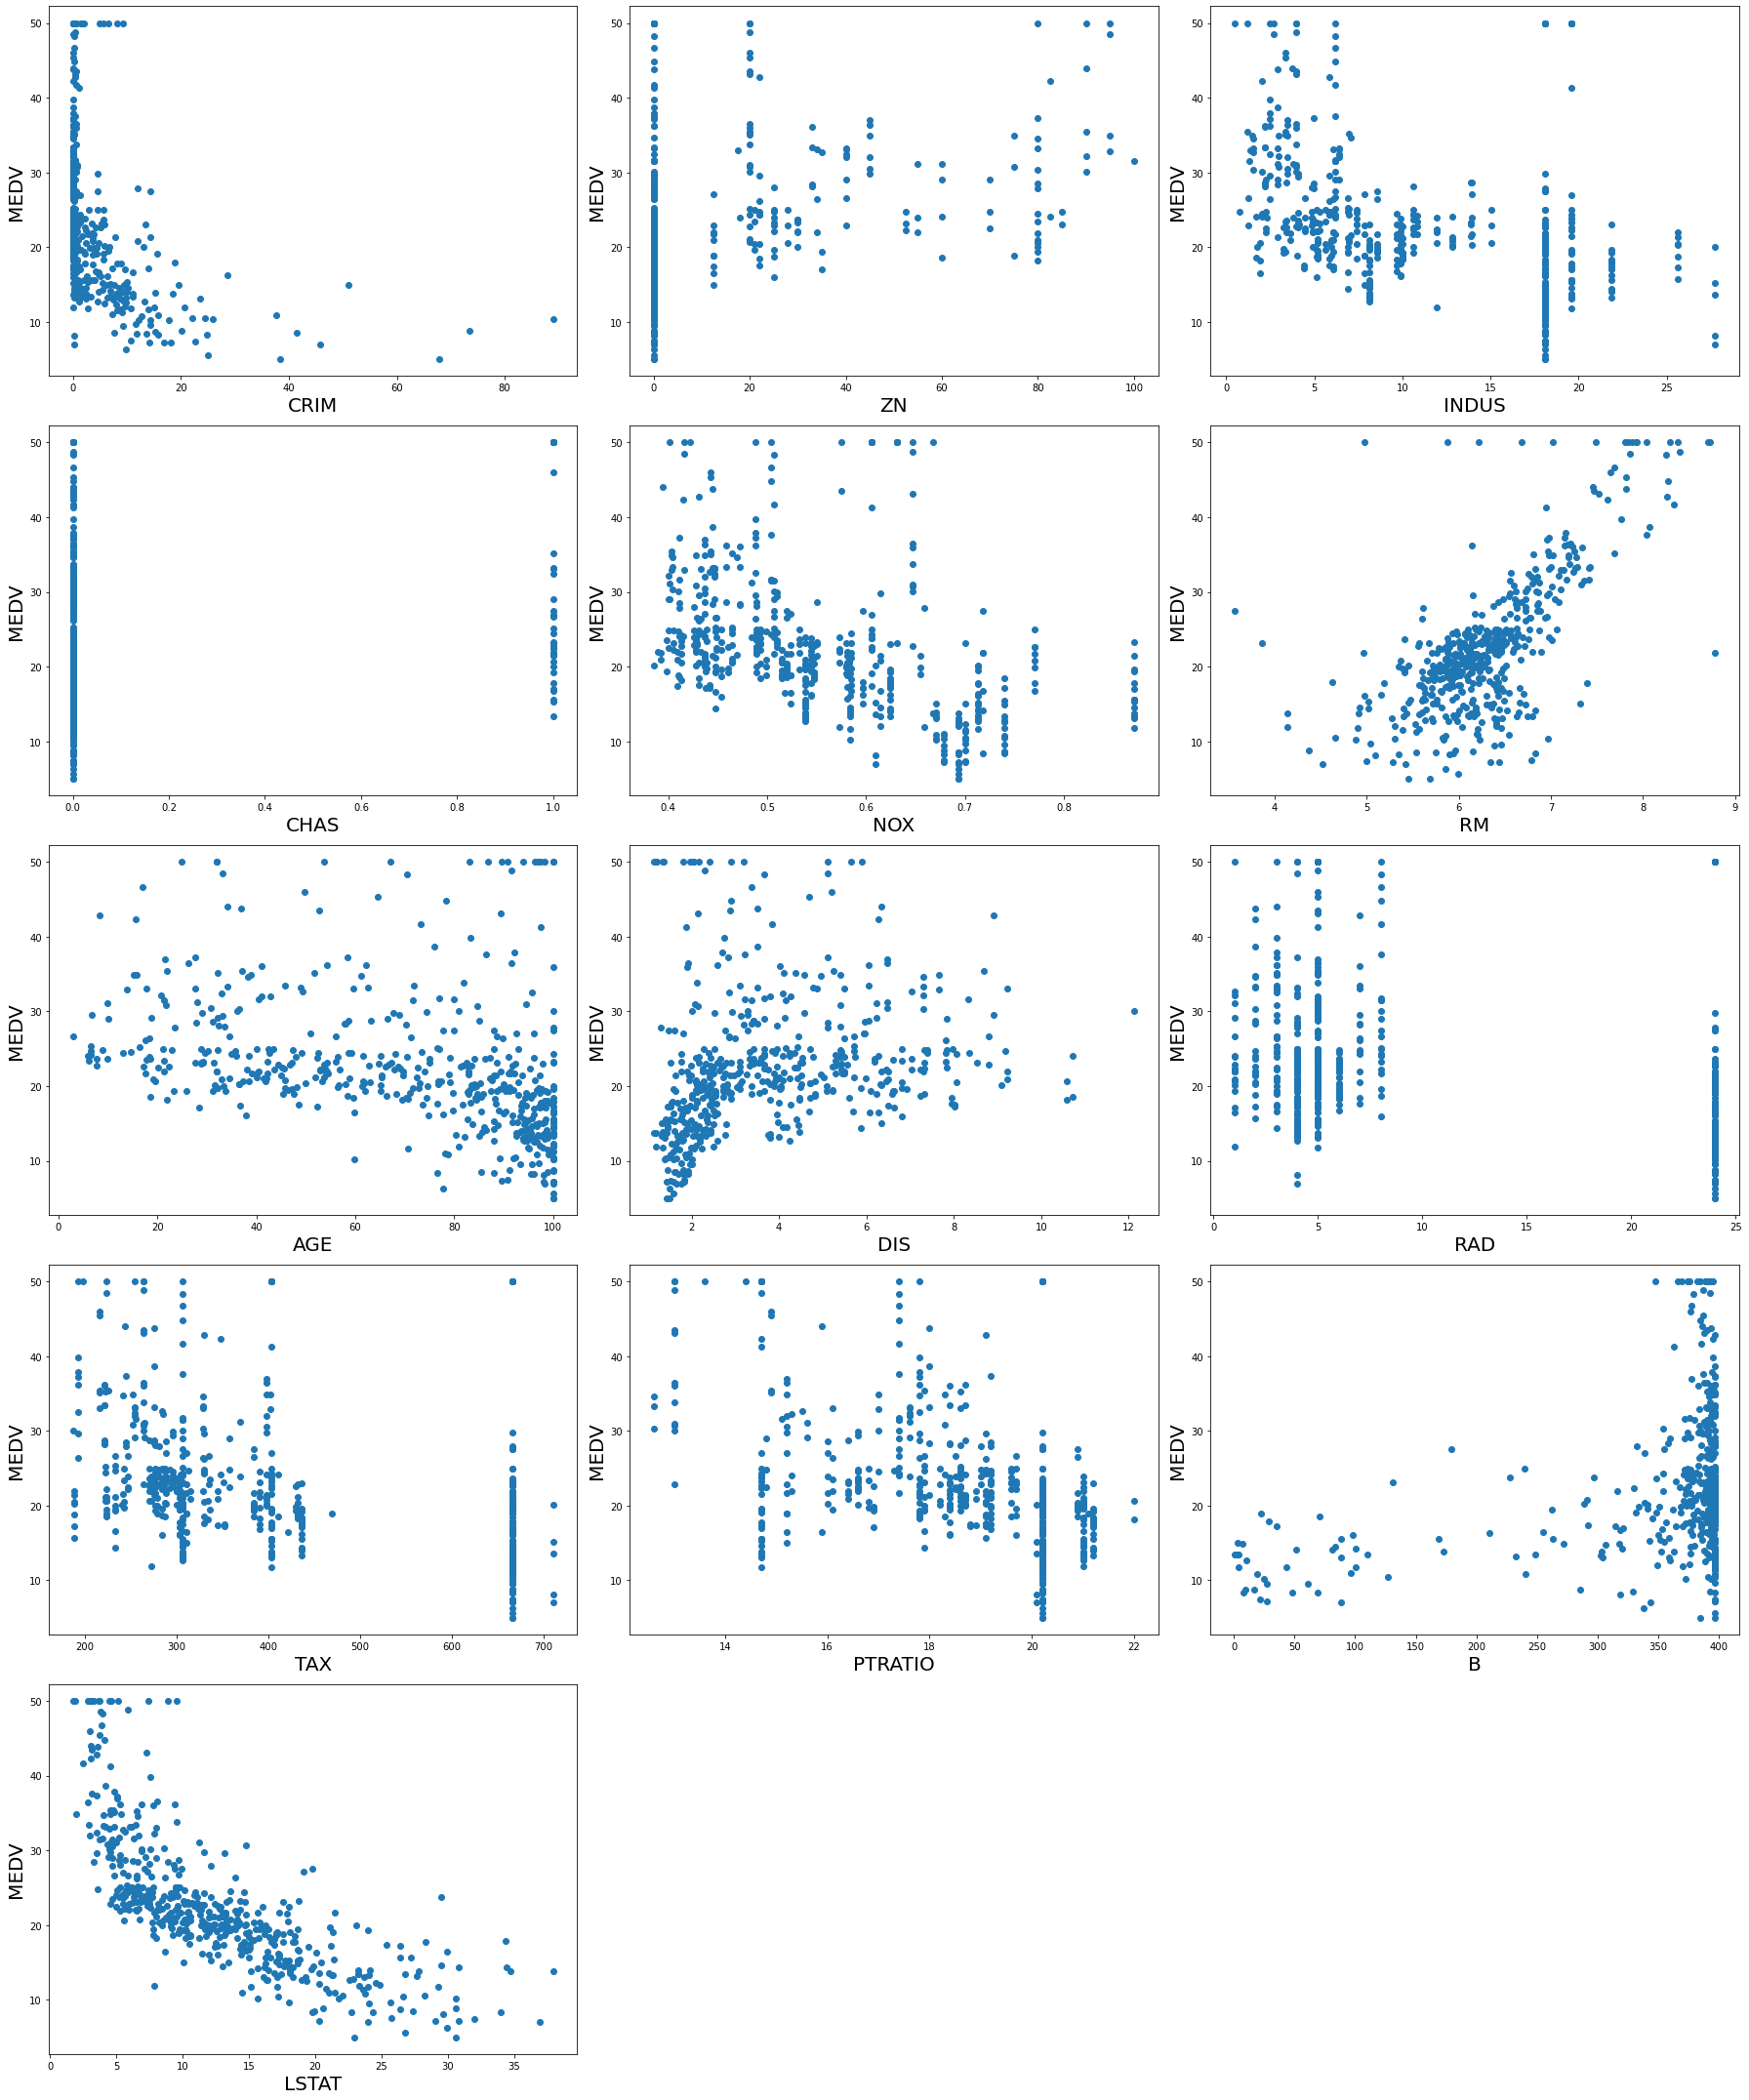

In [16]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The relationship between the dependent(target) and independent variables(features) look fairly linear.

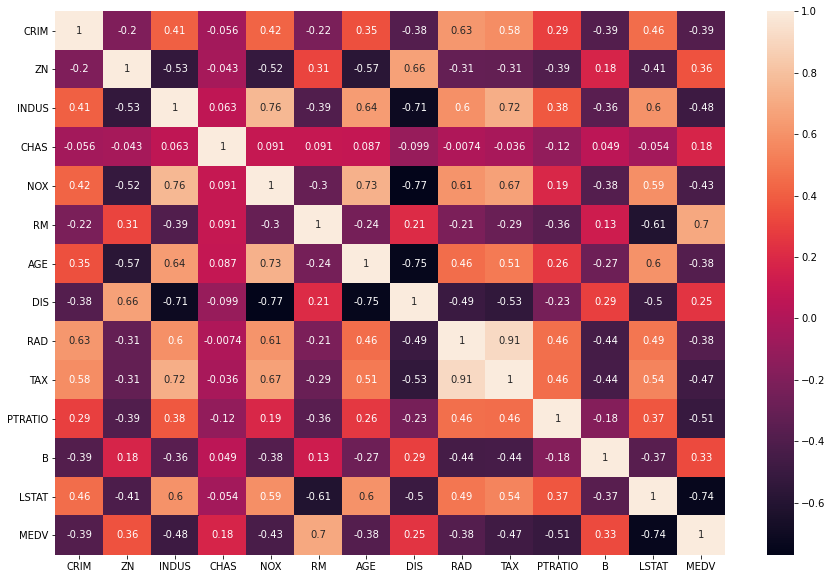

In [17]:
## Correlation between variables
plt.figure(figsize=(15,10), facecolor='white')
data.corr()
sns.heatmap(data=data.corr(), annot=True)

### Observation :-

1) "RM" , "LSTAT" columns are highly Correlate with our target variable "MEDV".

2) The features "RAD" ,"TAX" have a correlation of 0.91.So, These features are drop for multi-co-linearity Reason.

3) The columns "LSTAT", "INDUS", "RM", "NOX", "PTRAIO" has a correlation score above 0.5 with MEDV

4) Other Features are not so much correlate with our target variable "MEDV". So, we can drop it for better accuracy of model.

Based on the above observations we will "LSTAT", "INDUS", "RM", "NOX", "PTRATIO" as our features.

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
x = data[["INDUS","NOX","RM","PTRATIO","LSTAT"]]
x.head()

,INDUS,NOX,RM,PTRATIO,LSTAT
0,2.31,0.538,6.575,15.3,4.98
1,7.07,0.469,6.421,17.8,9.14
2,7.07,0.469,7.185,17.8,4.03
3,2.18,0.458,6.998,18.7,2.94
4,2.18,0.458,7.147,18.7,5.33


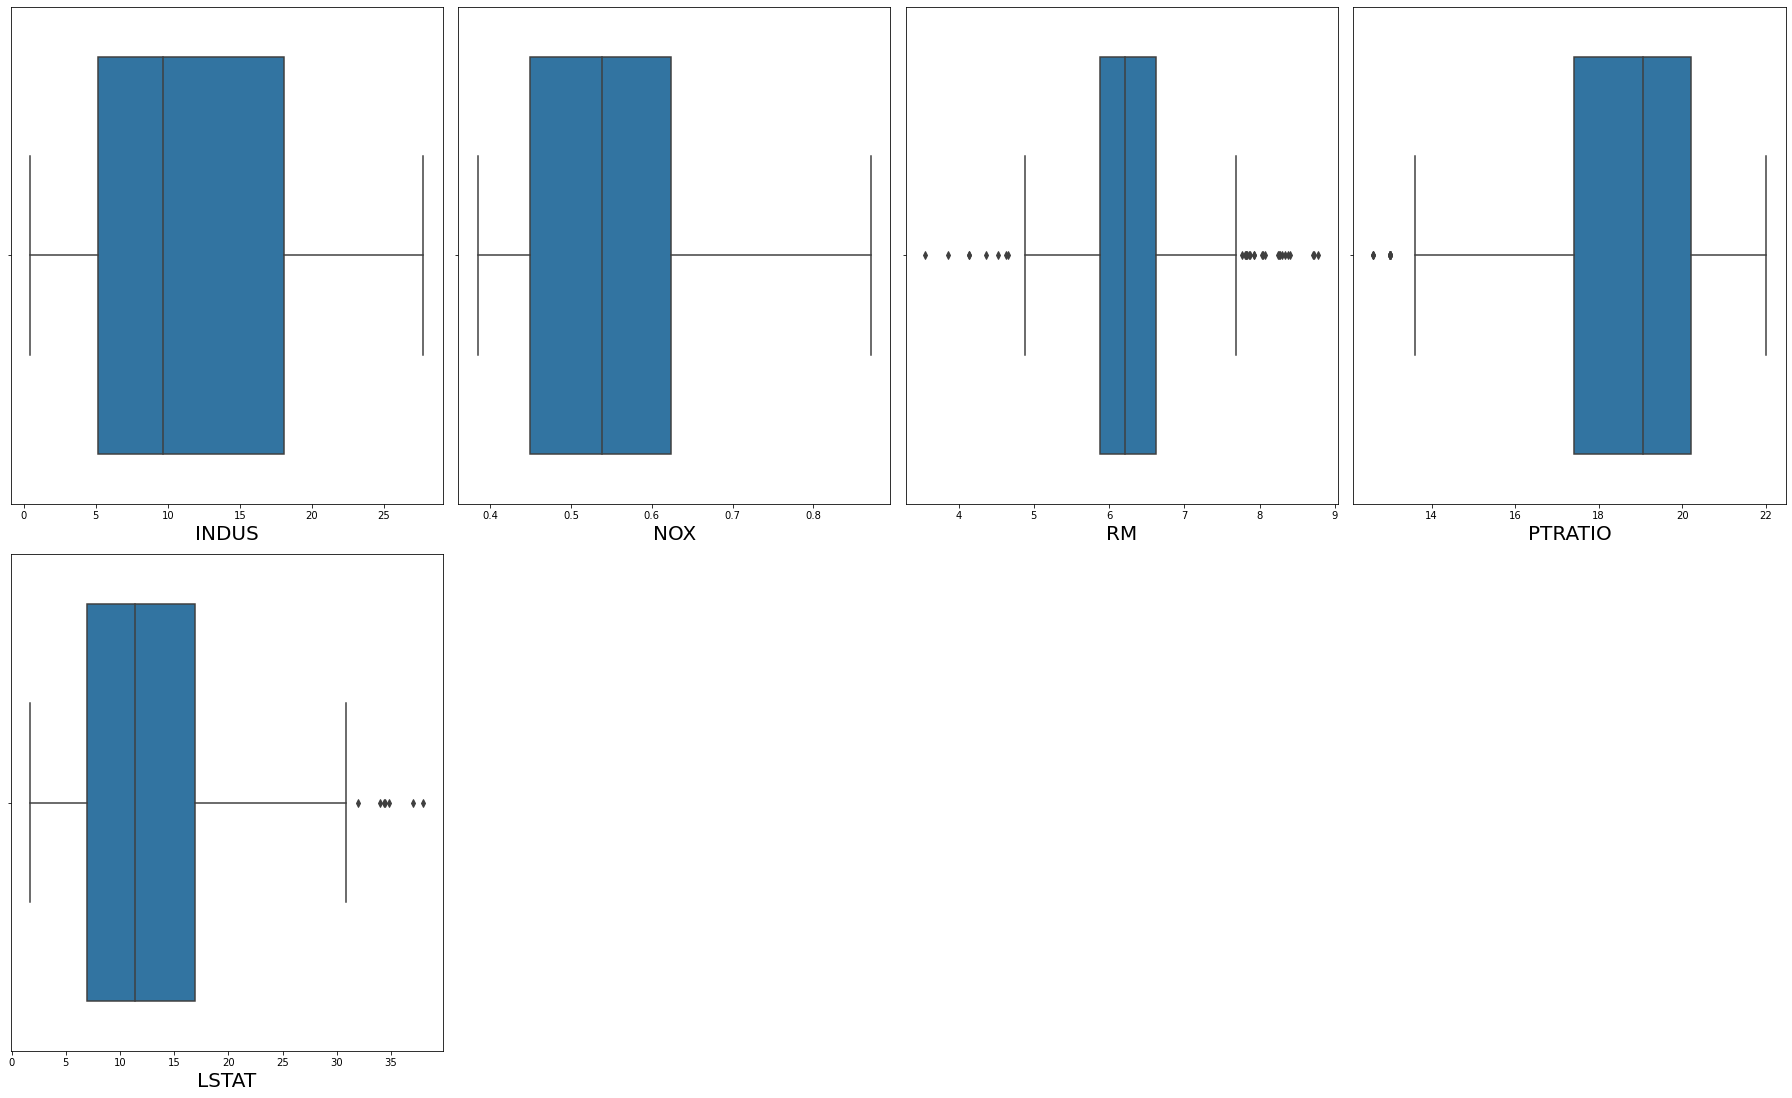

In [20]:
## Boxplot for detection outilers 
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Columns like "LSTAT", "RM", "PTRATIO" seems to have outliers. Let's see the outliers percentage in every column.

In [21]:
for k, v in x.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(x)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column PTRATIO outliers = 2.96%
Column LSTAT outliers = 1.38%


### Normalization

In [22]:
def plot_data(data,column):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    data[column].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[column],dist = "norm",plot = pylab)
    plt.show()

INDUS
*************************


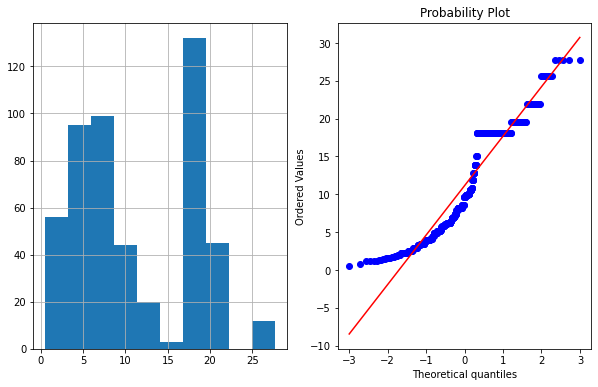

NOX
*************************


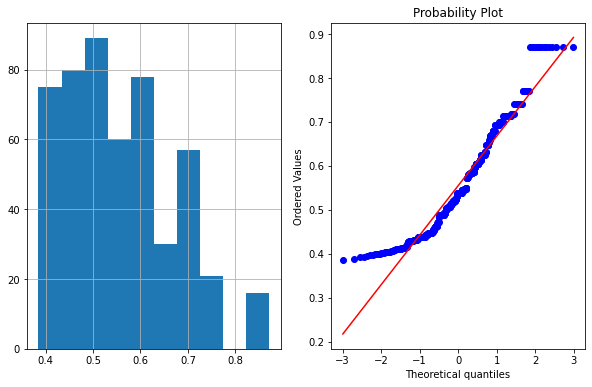

RM
*************************


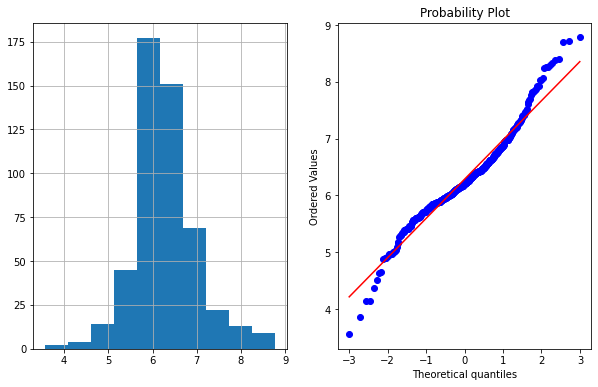

PTRATIO
*************************


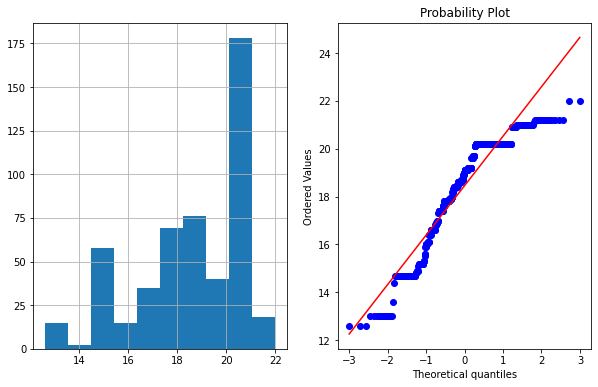

LSTAT
*************************


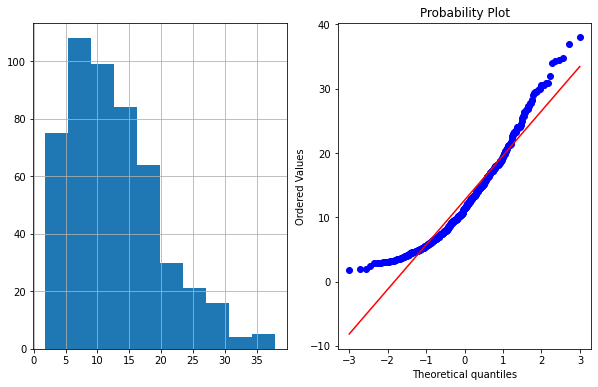

In [23]:
for column in x :
    print(column)
    print("*"*25)
    plot_data(x,column)

### Observation :-

1) "LSTAT" , "RM" Follows normal distribution.

2) "PTRATIO" , "NOX" , "INDUS" Follows fairly normal distribution.

In [29]:
X_scaled = x.copy()

### Spliting our data in train and test

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state=1)

In [31]:
x_train

,INDUS,NOX,RM,PTRATIO,LSTAT
42,6.91,0.448,6.169,17.9,5.81
58,5.13,0.453,6.145,19.7,6.86
385,18.10,0.700,5.277,20.2,30.81
78,12.83,0.437,6.232,18.7,12.34
424,18.10,0.584,5.565,20.2,17.16
...,...,...,...,...,...
255,3.64,0.392,5.876,16.4,9.25
72,10.81,0.413,6.065,19.2,5.52
396,18.10,0.693,6.405,20.2,19.37
235,6.20,0.507,6.086,17.4,10.88


In [32]:
y_train

42     25.3
58     23.3
385     7.2
78     21.2
424    11.7
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 404, dtype: float64

### Implementation of LinearRegression method 

In [33]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [35]:
lr.score(x_train,y_train)

0.6725103789478548

In [36]:
lr.score(x_test,y_test)

0.6943381539098886

In [37]:
adj_r2(x_train,y_train)

0.6683961877286068

In [38]:
adj_r2(x_test,y_test)

0.6784182660926954

1) Our r2 score is 67.25% and adj r2 is 66.83% for our training data.

2) Our r2 score and adj_r2 score for train and test data are similar to each other.Now let's check if our model is overfitting our data using regularization.

### Elastic net Regularization

In [39]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [40]:
alpha = elasticCV.alpha_
alpha

0.09604243988334474

In [41]:
l1_ratio = elasticCV.l1_ratio
l1_ratio

0.5

In [42]:
elasticnet_reg = ElasticNet(alpha= alpha,l1_ratio = l1_ratio)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.09604243988334474)

In [43]:
elasticnet_reg.score(x_test, y_test)

0.679699842920771

In [44]:
elasticnet_reg.score(x_train, y_train)

0.6690159772553184

So, we can see by using Elastic Net regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

### Saving the model to the local file system

In [45]:
import pickle
filename = 'final_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [47]:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict([[7.07,0.469,6.421,17.8,9.14]])
a

array([26.04725704])

In [48]:
loaded_model.predict([[2.18,0.458,6.998,18.7,2.94]])

array([30.63569458])